# KNN - with Cross Validation

**Dataset**: the iris dataset https://archive.ics.uci.edu/ml/datasets/Iris

Attribute Information:

* sepal_length: sepal length in cm
* sepal_width: sepal width in cm
* petal_length: petal length in cm
* petal_width: petal width in cm
* class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
      
*The contents of this notebook is heavily referenced from a tutorial on KNN by Kevin Zakka (https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)*

In [61]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('white')

%matplotlib inline

In [15]:
# Define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Read in the data and check first rows
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# General summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Quick Visualizations

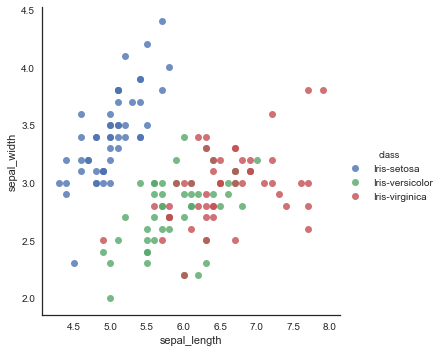

In [19]:
sns.lmplot(x='sepal_length', y='sepal_width',data=df, 
           fit_reg=False, hue='class')

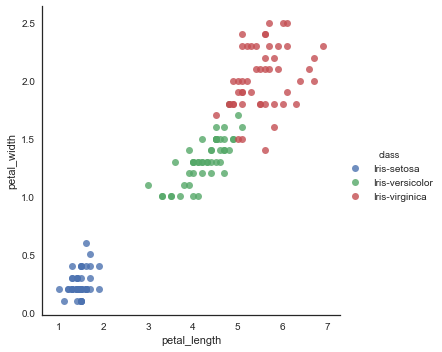

In [20]:
sns.lmplot(x='petal_length', y='petal_width',data=df, 
           fit_reg=False, hue='class')

A quick scan at the plots reveals that setosas tend to have shorter but wider sepals than the other two classes. Also, it seems that setosas have small petals, versicolors have medium petals, and virginica have the largest petals.

## The Model

In [22]:
# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:4])
y = np.array(df['class'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# instantiate learning model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate predictions
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

    avg / total       0.98      0.98      0.98        50



## Parameter Tuning with Cross Validation

Perform a 10-fold Cross Validation using a list of values for K, where K is an odd number ranging from 1 to 50. Only odd numbers are used for K to avoid ties.

In [49]:
# creating odd list of K for KNN
neighbors = list(range(1,50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [50]:
# changing to misclassification error
MSE = pd.Series([1 - x for x in cv_scores])

# determining best k
optimal_k = neighbors[MSE.idxmin()]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


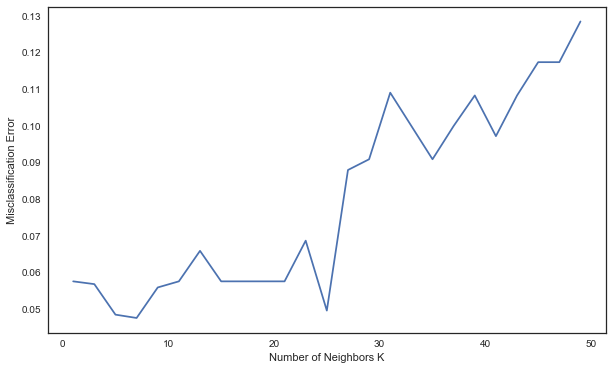

In [54]:
# plot misclassification error vs k
plt.figure(figsize=(10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## KNN Algorithm from Scratch

In [63]:
# Write function for the training block
def train(X_train, y_train):
    # do nothing 
    return


# Write function for the testing block
def test_and_predict(X_train, y_train, x_test, k):
    '''
    This function controls the testing and predicting block for KNN.
    The algorithm works in the following fashion:
        1. Calculate euclidean distance between the “testee” observation and all the data points in the training set. 
        2. Select the K nearest observations and perform a majority vote. 
        3. Assign the corresponding label to the "testee" observation. 
    '''
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [73]:
# Define custom KNN function  
        
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
        
    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(test_and_predict(X_train, y_train, X_test[i, :], k))

# making our predictions 
predictions = []
try:
    kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('The accuracy of our classifier is:', accuracy, '%')
    
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, pred))

    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, pred, digits=3))

except ValueError:
    print('ERROR: K cannot exceed number of observations!')

The accuracy of our classifier is: 98.0 %


Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        19
Iris-versicolor      0.938     1.000     0.968        15
 Iris-virginica      1.000     0.938     0.968        16

    avg / total      0.981     0.980     0.980        50

